In [8]:
from media_impact_monitor.data_loaders.news_online.mediacloud_ import (
    get_mediacloud_counts,
)
from media_impact_monitor.data_loaders.news_print.genios import get_genios_counts
from datetime import date
import matplotlib.pyplot as plt
from functools import partial
from time import time

Fetching mediacloud data for Klimawandel


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Failed to fetch mediacloud data for Klimawandel: HTTPSConnectionPool(host='search.mediacloud.org', port=443): Read timed out. (read timeout=60)
Took 60.89s
Fetching genios data for Klimawandel
Failed to fetch genios data for Klimawandel: 404 Client Error: Not Found for url: https://www.genios.de/api/searchResult/Alle/Presse?requestText=Klimawandel&size=0&sort=BY_DATE&order=desc&resultListType=DEFAULT&date=from_01.01.2022&date=to_01.01.2024&getDateHistograms=day
Took 0.13s


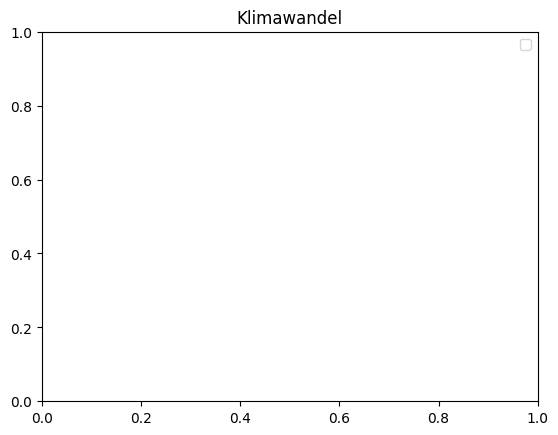

Fetching mediacloud data for Klimaschutz
Done in 27.17s
Fetching genios data for Klimaschutz
Failed to fetch genios data for Klimaschutz: 404 Client Error: Not Found for url: https://www.genios.de/api/searchResult/Alle/Presse?requestText=Klimaschutz&size=0&sort=BY_DATE&order=desc&resultListType=DEFAULT&date=from_01.01.2022&date=to_01.01.2024&getDateHistograms=day
Took 0.07s


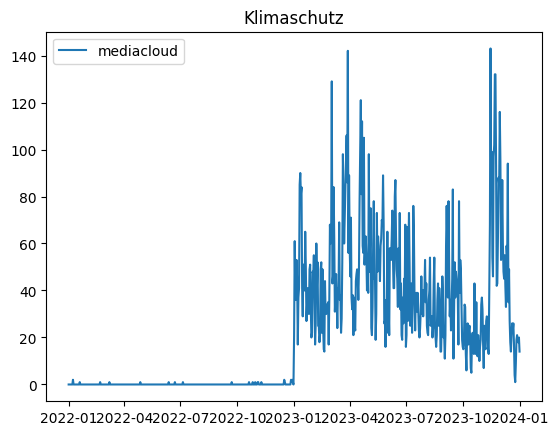

Fetching mediacloud data for Fridays for Future
Done in 36.74s
Fetching genios data for Fridays for Future
Failed to fetch genios data for Fridays for Future: 404 Client Error: Not Found for url: https://www.genios.de/api/searchResult/Alle/Presse?requestText=Fridays+for+Future&size=0&sort=BY_DATE&order=desc&resultListType=DEFAULT&date=from_01.01.2022&date=to_01.01.2024&getDateHistograms=day
Took 0.11s


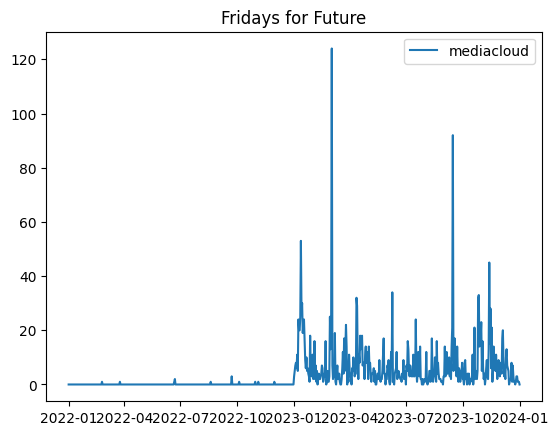

Fetching mediacloud data for Letzte Generation
Done in 27.47s
Fetching genios data for Letzte Generation
Failed to fetch genios data for Letzte Generation: 404 Client Error: Not Found for url: https://www.genios.de/api/searchResult/Alle/Presse?requestText=Letzte+Generation&size=0&sort=BY_DATE&order=desc&resultListType=DEFAULT&date=from_01.01.2022&date=to_01.01.2024&getDateHistograms=day
Took 0.10s


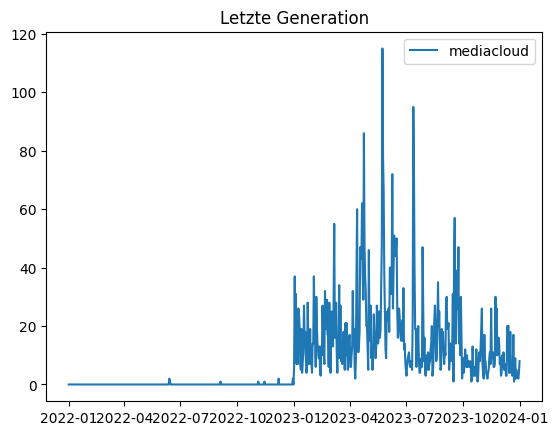

In [11]:
_get_mediacloud_counts = partial(get_mediacloud_counts, countries=["Germany"])

for kw in ["Klimawandel", "Klimaschutz", "Fridays for Future", "Letzte Generation"]:
    fig, ax = plt.subplots()
    for fname, f in [
        ("mediacloud", _get_mediacloud_counts),
        ("genios", get_genios_counts),
    ]:
        print(f"Fetching {fname} data for {kw}")
        t0 = time()
        try:
            counts = f(kw, date(2022, 1, 1), date(2024, 1, 1))
        except Exception as e:
            print(f"Failed to fetch {fname} data for {kw}: {e}")
            print(f"Took {time()-t0:.2f}s")
            continue
        print(f"Done in {time()-t0:.2f}s")
        ax.plot(counts.index, counts, label=fname)
    ax.set_title(kw)
    ax.legend()
    plt.show()